In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/home/visi/blog':
  os.chdir(r'/home/visi/blog')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/tmp/ipykernel_41888/957477716.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/usr/lib/python3.10/importlib/_bootstrap.py": 1726069656.0, "/usr/lib/python3.10/importlib/_bootstrap_external.py": 1726069656.0, "/usr/lib/python3.10/codecs.py": 1726069656.0, "/usr/lib/python3.10/encodings/aliases.py": 1726069656.0, "/usr/lib/python3.10/encodings/__init__.py": 1726069656.0, "/usr/lib/python3.10/encodings/utf_8.py": 1726069656.0, "/usr/lib/python3.10/abc.py": 1726069656.0, "/usr/lib/python3.10/io.py": 1726069656.0, "/usr/lib/python3.10/stat.py": 1726069656.0, "/usr/lib/python3.10/_collections_abc.py": 1726069656.0, "/usr/lib/python3.10/genericpath.py": 1726069656.0, "/usr/lib/python3.10/posixpath.py": 1726069656.0, "/usr/lib/python3.10/os.py": 1726069656.0, "/usr/lib/python3.10/_sitebuiltins.py": 1726069656.0, "/usr/lib/python3.10/sitecustomize.py": 1648890259.0, "/usr/lib/python3.10/site.py": 1726069656.0, "/usr/lib/python3.10/warnings.py": 1726069656.0, "/usr/lib/python3.10/importlib/__init__.py": 1726069656.0, "/usr/lib/python3.10/importlib/machinery.py": 1726069

In [2]:
#| include: false

! pip install duckduckgo-search

In [3]:
from duckduckgo_search import DDGS
from fastcore.all import *

def search_images(term, max_images=30):
    """
    Search for images using DuckDuckGo's search engine
    
    Parameters:
    - term: search term/query (e.g., "cars", "bikes")
    - max_images: maximum number of images to return (default 30)
    
    Returns:
    - List of image URLs
    """
    print(f"Searching for '{term}'")
    
    with DDGS() as ddgs:  # Create a DuckDuckGo search session
        # Process:
        # 1. Search for images using ddgs.images()
        # 2. Convert results to fastcore's List type
        # 3. Extract just the image URLs
        return L(ddgs.images(term, max_results=max_images)).itemgot('image')

In [4]:
# get images urls, in this case just 1 url
urls =  search_images('car photos',max_images=1)
urls[0]

Searching for 'car photos'


'https://images.pexels.com/photos/241316/pexels-photo-241316.jpeg?cs=srgb&dl=alloy-asphalt-auto-241316.jpg&fm=jpg'

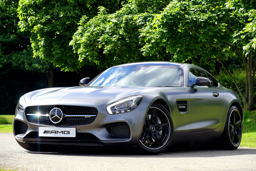

In [5]:
from fastdownload import download_url
dest = 'car.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'bicycle photos'


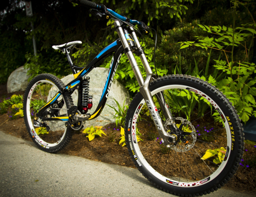

In [6]:
download_url(search_images('bicycle photos', max_images=1)[0], 'bicycle.jpg', show_progress=False)
Image.open('bicycle.jpg').to_thumb(256,256)

Searching for 'electric scooter'


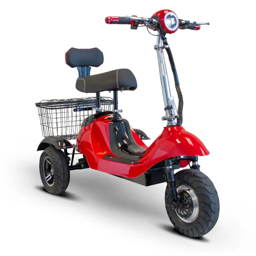

In [7]:
download_url(search_images('electric scooter', max_images=1)[0], 'scooter.jpg', show_progress=False)
Image.open('scooter.jpg').to_thumb(256,256)

In [8]:
#| warning: false
#| output: true
searches = 'car','bicycle','electric scooter'
path = Path('car_bicycle_or_scooter')
from time import sleep

for o in searches:
    # destination, create a directory if it doesnt exist, then download images for the o term
    # resize the images 
    dest = path/o # car_bicycle_or_scooter/car 
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)     

Searching for 'car photo'


Searching for 'car sun photo'


Searching for 'car shade photo'


Searching for 'bicycle photo'


Searching for 'bicycle sun photo'


Searching for 'bicycle shade photo'


Searching for 'electric scooter photo'


Searching for 'electric scooter sun photo'


Searching for 'electric scooter shade photo'


/home/visi/blog/venv/lib/python3.10/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/home/visi/blog/venv/lib/python3.10/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [9]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

15

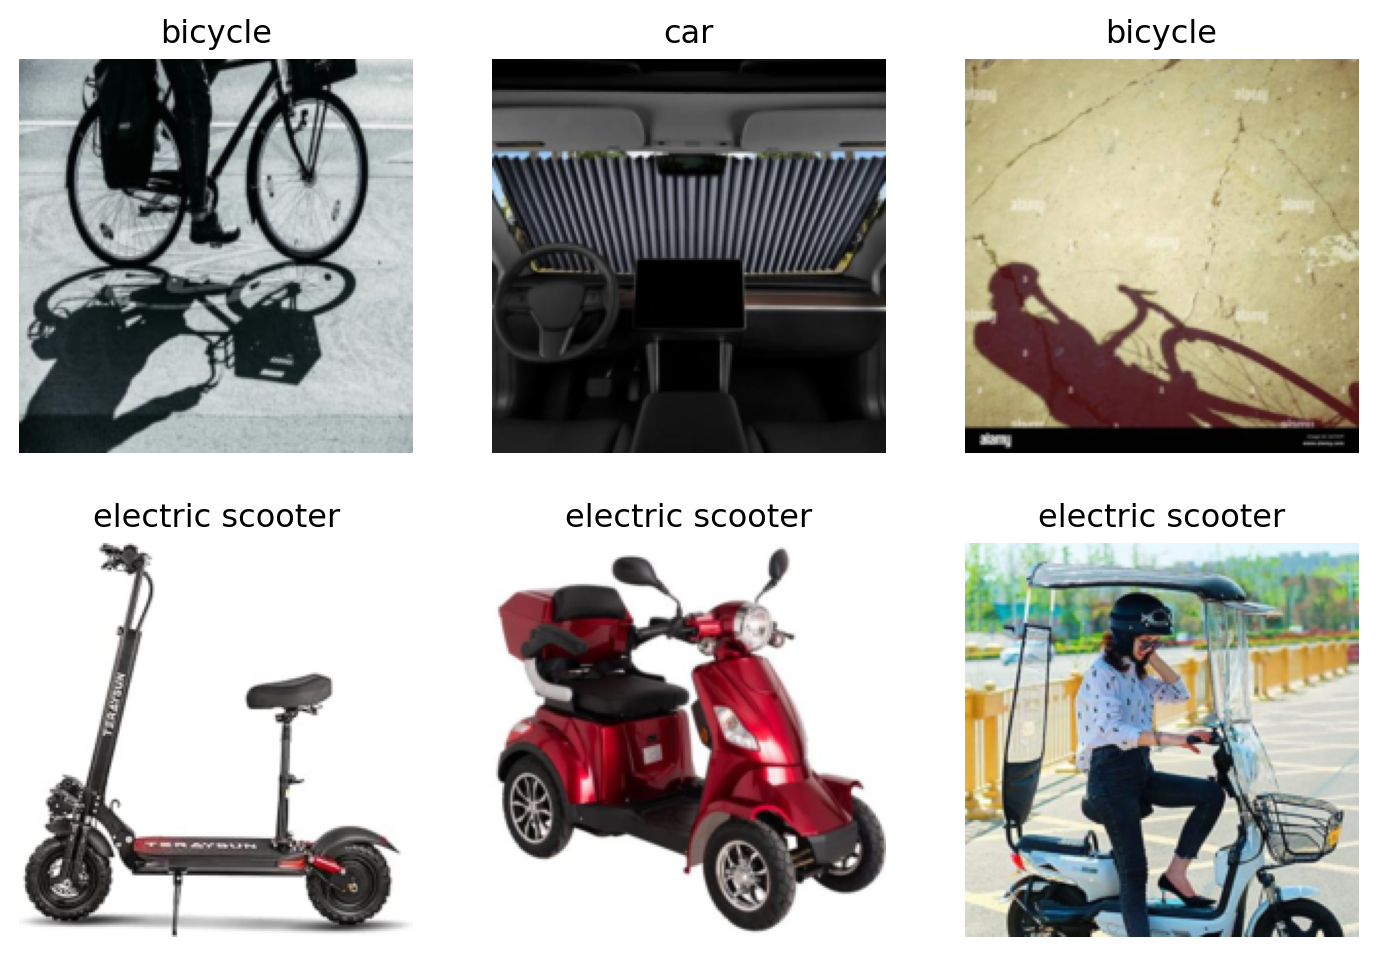

In [10]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    # car_bicycle_or_scooter/car/image1.jpg → label is "car"
    # car_bicycle_or_scooter/bicycle/image2.jpg → label is "bicycle"
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32) 

dls.show_batch(max_n=6) # shows 6 images from a batch, displays both images and their labels

In [11]:
# Create a vison learner using the DataLoaders we created above, resNet18 pre-trained model, and a metrics to measure the error rate.
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.668419,0.081710,0.025210,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.067997,0.040579,0.004202,00:03
1,0.035534,0.002521,0.000000,00:03
2,0.026271,0.001035,0.000000,00:03


In [12]:
print("Model classes:", learn.dls.vocab)

Model classes: ['bicycle', 'car', 'electric scooter']


In [13]:
is_car,_,probs = learn.predict(PILImage.create('car.jpg'))
print(f"This is a: {is_car}.")
print(f"Probability it's a car: {probs[1]:.4f}")

This is a: car.
Probability it's a car: 1.0000


In [14]:
is_bicycle,_,probs = learn.predict(PILImage.create('bicycle.jpg'))
print(f"This is a: {is_bicycle}.")
print(f"Probability it's a bicycle: {probs[0]:.4f}")

This is a: bicycle.
Probability it's a bicycle: 0.9997


In [15]:
is_scooter,_,probs = learn.predict(PILImage.create('scooter.jpg'))
print(f"This is a: {is_scooter}.")
print(f"Probability it's a scooter: {probs[2]:.4f}")

This is a: electric scooter.
Probability it's a scooter: 1.0000


In [16]:
is_car,_,probs = learn.predict(PILImage.create('car.jpg'))
print(f"This is a: {is_car}.")
print(f"Probability it's a bicycle: {probs[0]:.4f}")

This is a: car.
Probability it's a bicycle: 0.0000
